In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#loading, cleaning, wrangling data for all stars + batters 
DATA_FOLDER = '../data/'
all_star_df = pd.read_csv(f'{DATA_FOLDER}/AllstarFull.csv')
batting_df = pd.read_csv(f'{DATA_FOLDER}/Batting.csv')
players_df = pd.read_csv(f"{DATA_FOLDER}People.csv")
stats_df = pd.read_csv(f"{DATA_FOLDER}jeffbagwell_war_historical_2023.csv", encoding='latin-1')
all_star_df = all_star_df[all_star_df['yearID'] >= 2012]
batting_df = batting_df[batting_df['yearID'] >= 2012]
stats_df = stats_df[stats_df['year_ID']>=2012]
batting_df['PA'] = batting_df['AB'] + batting_df['BB'] + batting_df['HBP'] + batting_df['SF'] + batting_df['SH']
batting_df['AVG'] = batting_df['H'] / batting_df['AB']
batting_df['OBP'] = (batting_df['H'] + batting_df['BB'] + batting_df['HBP']) / (batting_df['AB'] + batting_df['BB'] + batting_df['HBP'] + batting_df['SF'])
batting_columns = ['playerID', 'yearID', 'teamID','PA','AB', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'AVG', 'OBP']
all_star_columns= ['playerID', 'yearID', 'teamID', 'GP']
players_column = ['nameFirst', 'nameLast','playerID']
batting_df = batting_df[batting_columns]
all_star_df = all_star_df[all_star_columns]
players_df = players_df[players_column]
batting_df
stats_df[stats_df['key_bbref']=='abreubo01']
stats_df['OPS'] = stats_df['OBP_plus']+stats_df['SLG_plus']
print(stats_df['player_name'])

6         David Aardsma
7         David Aardsma
8         David Aardsma
57        Fernando Abad
58        Fernando Abad
              ...      
113549      Mike Zunino
113550      Mike Zunino
113582        Tony Zych
113583        Tony Zych
113584        Tony Zych
Name: player_name, Length: 17478, dtype: object


In [15]:
all_star_batters = pd.merge(batting_df, all_star_df, on=['playerID', 'yearID', 'teamID'], how='left')
all_star_batters = pd.merge(all_star_batters, players_df, on='playerID', how='left')
all_star_batters = pd.merge(all_star_batters, stats_df,  how='right', left_on=['playerID','yearID','teamID'], right_on = ['key_bbref','year_ID','team_ID'])

In [16]:
all_star_batters['AS_selection'] = all_star_batters['GP'].replace(0,1) 
all_star_batters['AS_selection'] = all_star_batters['AS_selection'].fillna(0)
all_star_batters['AS_selection'] = all_star_batters['AS_selection'].replace(0,False)
all_star_batters['AS_selection'] = all_star_batters['AS_selection'].replace(1,True)
all_star_batters[((all_star_batters['yearID']=='2022')&(all_star_batters['AS_selection']==True))]

,playerID,yearID,teamID,PA,AB,H,2B,3B,HR,RBI,...,gms_DH,gms_PH,gms_PR,prev_tm,arrived,departed,next_tm,salary,OPS,AS_selection


In [17]:
 all_star_batters['AS_selection'].value_counts(dropna = False)

False    17045
True       445
Name: AS_selection, dtype: int64

0        David Aardsma
1        David Aardsma
2        David Aardsma
3        Fernando Abad
4        Fernando Abad
             ...      
17485      Mike Zunino
17486      Mike Zunino
17487        Tony Zych
17488        Tony Zych
17489        Tony Zych
Name: player_name, Length: 17490, dtype: object


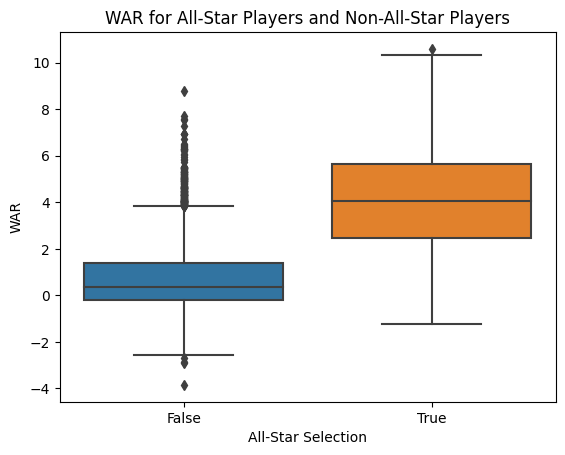

239      2019.0
404      2014.0
2128     2021.0
2611     2019.0
3133     2015.0
3281     2013.0
3285     2018.0
4859     2013.0
4862     2016.0
5067     2018.0
6234     2019.0
6315     2017.0
8879     2013.0
9093     2013.0
9627     2021.0
10479    2015.0
11259    2018.0
12915    2017.0
14595    2014.0
14938    2019.0
15602    2016.0
16875    2021.0
17197    2021.0
Name: yearID, dtype: float64


In [18]:
print(all_star_batters['player_name'])
all_star_batters_min = all_star_batters[all_star_batters['PA']>50]

sns.boxplot(x='AS_selection', y='bwar162', data=all_star_batters_min)
plt.title('WAR for All-Star Players and Non-All-Star Players')
plt.xlabel('All-Star Selection')
plt.ylabel('WAR')
plt.show()
print(all_star_batters_min[((all_star_batters_min['PA']<75)&(all_star_batters_min['AS_selection']==True))]['yearID'])

## Relationship between Plate Appearances and All-Star Selection
Median - higher. 
Distribution - higher  (provide explanation + analyze) 


In [19]:
#Most all star selections since 2012

all_star_counts = all_star_batters.groupby(['playerID','nameFirst', 'nameLast'])['AS_selection'].sum().reset_index()
most_as = all_star_counts.sort_values(by = 'AS_selection', ascending = False)
most_as.head(20)

,playerID,nameFirst,nameLast,AS_selection
2861,troutmi01,Mike,Trout,9
66,altuvjo01,Jose,Altuve,7
1062,goldspa01,Paul,Goldschmidt,6
425,cabremi01,Miguel,Cabrera,6
643,cruzne02,Nelson,Cruz,6
1501,kimbrcr01,Craig,Kimbrel,6
951,freemfr01,Freddie,Freeman,5
113,arenano01,Nolan,Arenado,5
1758,martijd02,J. D.,Martinez,5
332,brantmi02,Michael,Brantley,5


In [20]:
#all stars PA (ignore the pitchers -- outliers)
top_players = most_as.nlargest(20, 'AS_selection')
top_players = pd.merge(top_players, batting_df[['playerID', 'PA']], on='playerID')
#top_players = top_players.groupby('playerID', as_index = False)['PA'].sum()
top_players = top_players.sort_values(by = 'PA', ascending = False)
top_players

,playerID,nameFirst,nameLast,AS_selection,PA
166,bettsmo01,Mookie,Betts,4,730.0
139,blackch02,Charlie,Blackmon,4,725.0
148,bogaexa01,Xander,Bogaerts,4,719.0
15,altuvjo01,Jose,Altuve,7,717.0
1,troutmi01,Mike,Trout,9,716.0
...,...,...,...,...,...
183,verlaju01,Justin,Verlander,4,0.0
182,verlaju01,Justin,Verlander,4,0.0
61,kimbrcr01,Craig,Kimbrel,6,0.0
176,verlaju01,Justin,Verlander,4,0.0


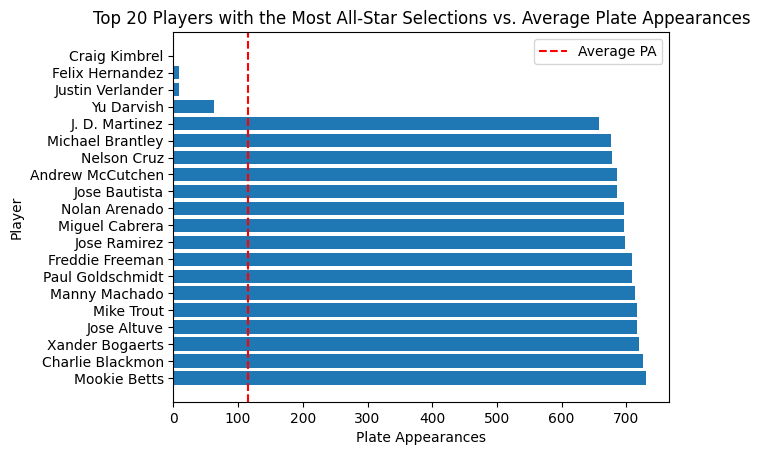

In [21]:
avg_pa = batting_df['PA'].mean()
# Create a horizontal bar chart comparing the top 20 players' PAs against the average PA
plt.barh(top_players['nameFirst'] + ' ' + top_players['nameLast'], top_players['PA'])
plt.axvline(x=avg_pa, color='red', linestyle='--')
plt.xlabel('Plate Appearances')
plt.ylabel('Player')
plt.title('Top 20 Players with the Most All-Star Selections vs. Average Plate Appearances')
plt.legend(['Average PA'])
plt.show()

In [22]:
# all_star_counts['AS_selection'] = all_star_counts['AS_selection'].astype(int)
# plt.hist(all_star_counts['AS_selection'], bins=range(0, max(all_star_counts['AS_selection'])+2, 1))
# plt.title('Distribution of All-Star Selections')
# plt.xlabel('Number of All-Star Selections')
# plt.ylabel('Count')
# plt.show()

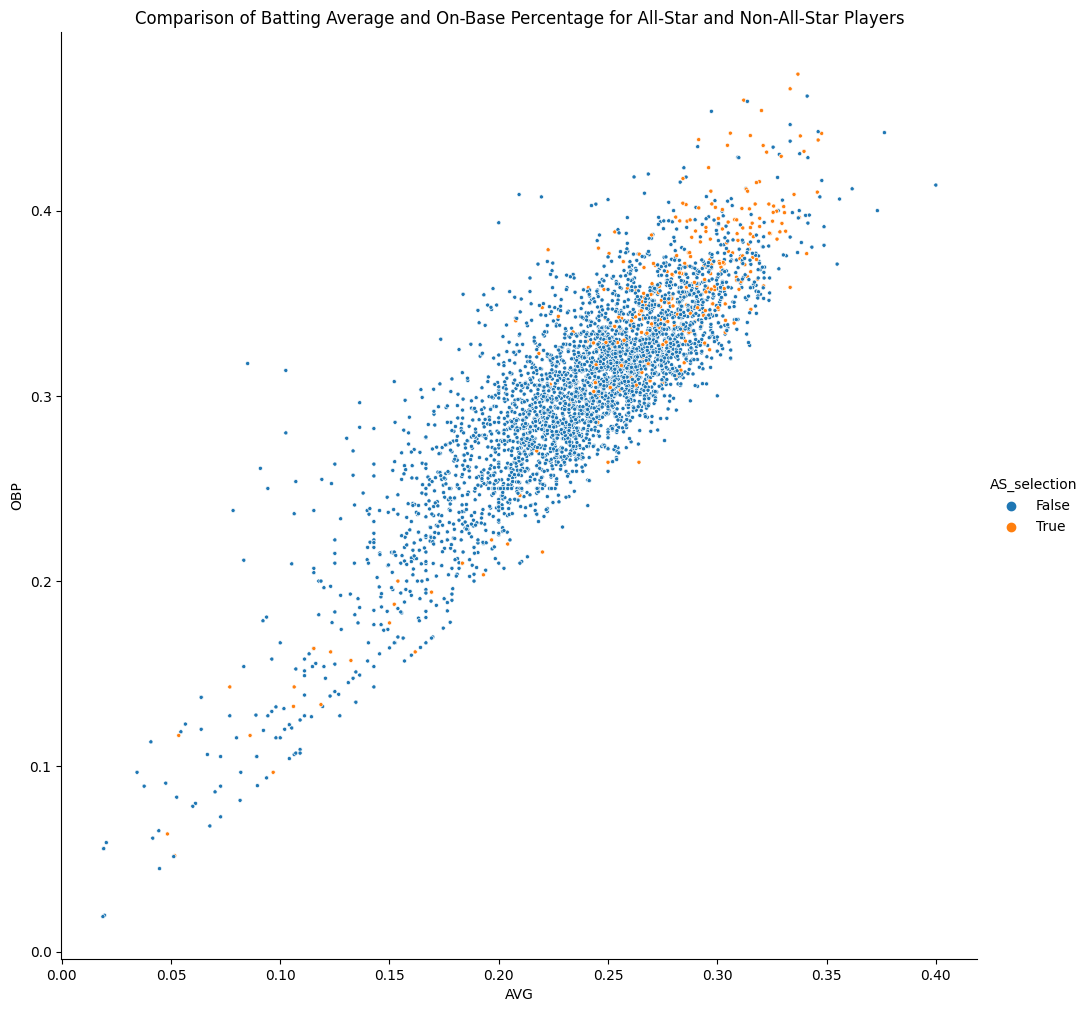

In [23]:
#AVG AND OBP against All stars and non all stars -- visualize here. 
sns.relplot(x='AVG', y='OBP', hue='AS_selection', data=all_star_batters_min,marker = '.',height=10)
plt.title('Comparison of Batting Average and On-Base Percentage for All-Star and Non-All-Star Players')
plt.show()

In [24]:
try:
    import sklearn
    print(sklearn.__version__)
    if (sklearn.__version__ != '1.2.1' and sklearn.__version__ != '1.2.2'): #update for latest otter version
        !pip install -U --user scikit-learn
except Exception as e:
    !pip install scikit-learn

1.2.2


In [25]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
all_star_batters_min['OPS'].fillna(0, inplace = True)
all_star_batters_min['bwar162'].fillna(0, inplace = True)
all_star_batters_min['wRC_plus'].fillna(0, inplace = True)
all_star_batters_min['AVG_plus'].fillna(0, inplace = True)
data = all_star_batters_min[['bwar162','wRC_plus']]
data = data.set_index(all_star_batters_min['player_name'])
target = all_star_batters_min['AS_selection']
index = all_star_batters_min['player_name']
train_data, test_data, train_target, test_target, train_index, target_index = train_test_split(
    data, target, index, test_size=0.3, random_state=2)
# Write your code for question 4 here
params_to_try = {'n_neighbors': range(2,30)}
knn_search = GridSearchCV(estimator=KNeighborsClassifier(),param_grid = params_to_try)
knn_search.fit(X=train_data,y=train_target)
n = int(knn_search.best_params_.get('n_neighbors')) # int: n_neighbors
knn_model = KNeighborsClassifier(n_neighbors = n)
knn_model.fit(X=train_data,y=train_target)
predict = knn_model.predict(test_data)
predict = pd.Series(predict)
score = float(accuracy_score(test_target,predict))
predict.reset_index(drop=True,inplace=True)
test_target.reset_index(drop=True,inplace=True)
target_index.reset_index(drop=True,inplace=True)
print("Optimal n_neighors:", n)
print("Accuracy on testing data:", score)
check = pd.concat([test_target,predict],axis=1,ignore_index=True)
check = check.set_index(target_index)
check.columns = ['AS_selection','AS_prediction']
check_diff = check[check['AS_selection']!=check['AS_prediction']]
pd.options.display.max_rows = 4000
print(check_diff)

/var/folders/0z/kg50wt6n6_gf_nr4y8svkf7m0000gr/T/ipykernel_73461/3899336232.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_star_batters_min['OPS'].fillna(0, inplace = True)
/var/folders/0z/kg50wt6n6_gf_nr4y8svkf7m0000gr/T/ipykernel_73461/3899336232.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_star_batters_min['bwar162'].fillna(0, inplace = True)
/var/folders/0z/kg50wt6n6_gf_nr4y8svkf7m0000gr/T/ipykernel_73461/3899336232.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

Optimal n_neighors: 8
Accuracy on testing data: 0.9404145077720207
                   AS_selection  AS_prediction
player_name                                   
Garrett Cooper             True          False
Miguel Cabrera             True          False
Freddie Freeman            True          False
Elvis Andrus               True          False
Miguel Montero             True          False
DJ LeMahieu                True          False
Mitch Garver              False           True
Jose Altuve                True          False
Ian Kinsler                True          False
Yoenis Céspedes            True          False
Josh Hamilton              True          False
Nick Castellanos           True          False
Rafael Devers              True          False
Jason Castro               True          False
Josh Harrison              True          False
George Springer            True          False
Freddie Freeman           False           True
Mike Foltynewicz           True         

In [14]:
#AVG AND OBP against All stars and non all stars -- visualize here. 